In [7]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.least_squares import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from helpers.proj1_helpers import *
# Aya : '/Users/mac/Documents/GitHub/ml-project-1-aaa_project1/data/train.csv' 
DATA_TRAIN_PATH = '/home/adeye/Documents/EPFL/MA1/ML_course/projects/ml-project-1-aaa_project1/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [17]:
features = ['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_pt_h','DER_deltaeta_jet_jet',
            'DER_mass_jet_jet','DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_sum_pt',
            'DER_pt_ratio_lep_tau','DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt',
            'PRI_tau_eta','PRI_tau_phi','PRI_lep_pt','PRI_lep_eta','PRI_lep_phi','PRI_met','PRI_met_phi',
            'PRI_met_sumet','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi',
            'PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi','PRI_jet_all_pt']

In [18]:
def remove_outliers(x):
    '''go through every column and calculate it's mean'''
    nbColumns = x.shape[1]
    for i in range(nbColumns):
        #we calculate the median of the current column after discarding the -999 values (they should not be in the median)
        median = np.median(x[:,i][x[:,i]!= -999])
        
        #we find the indices of the elements with value -999 in our current column
        indices = x[:,i] == -999
        
        #we replace the element at the found indices by the median of the current column
        x[:,i][indices] = median  

In [19]:
remove_outliers(tX)

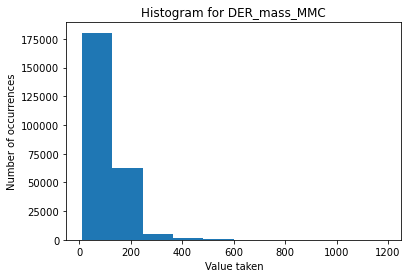

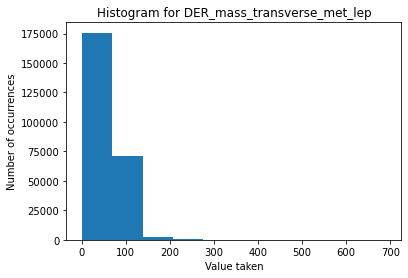

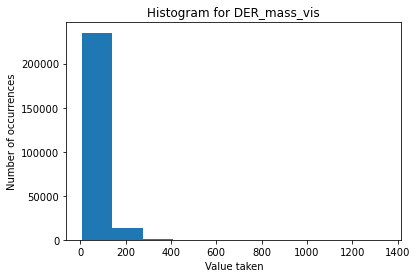

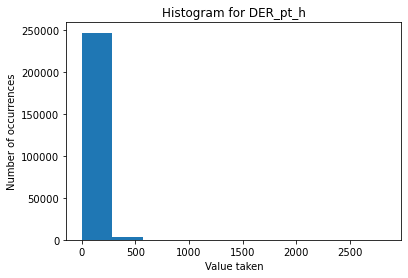

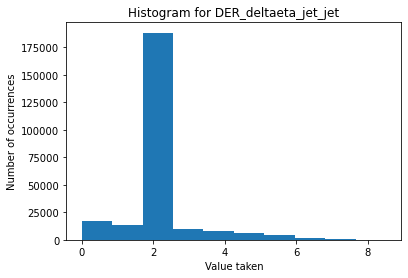

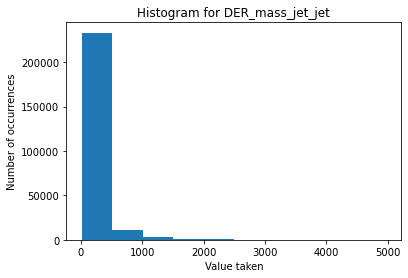

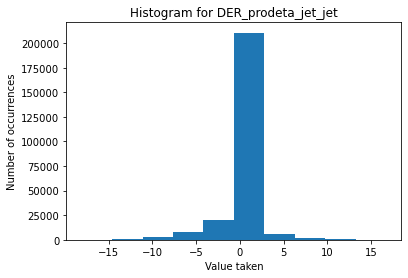

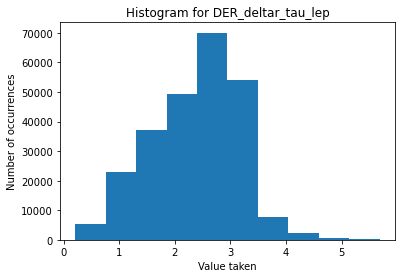

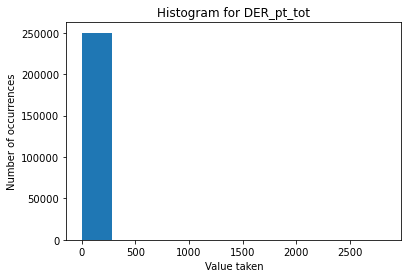

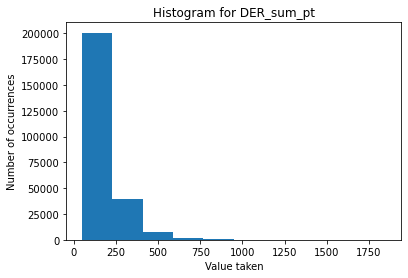

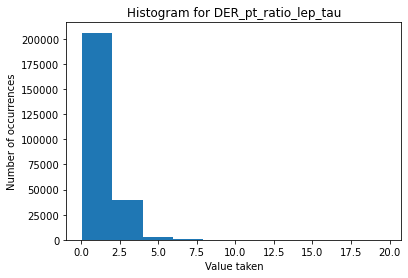

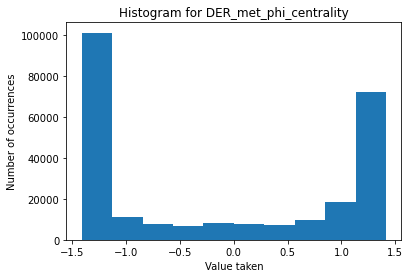

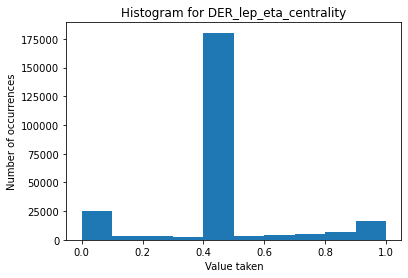

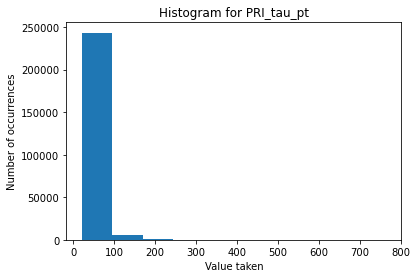

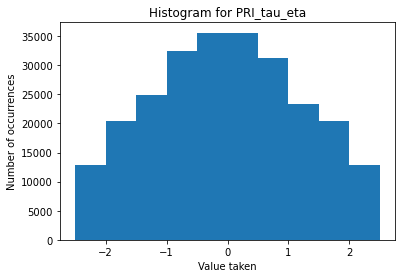

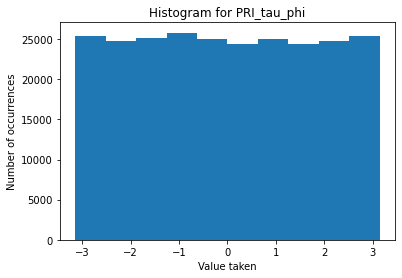

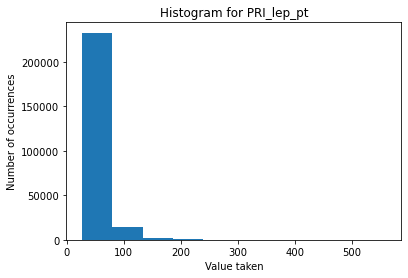

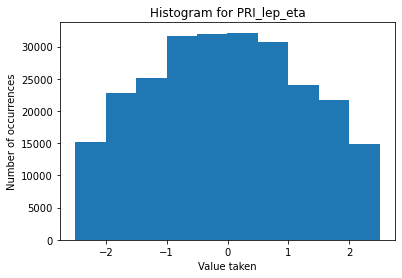

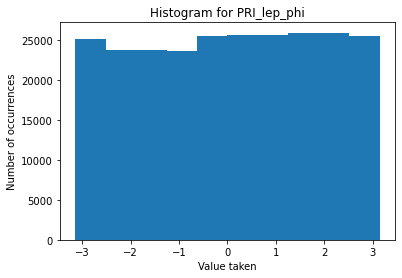

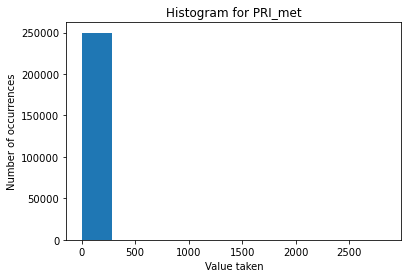

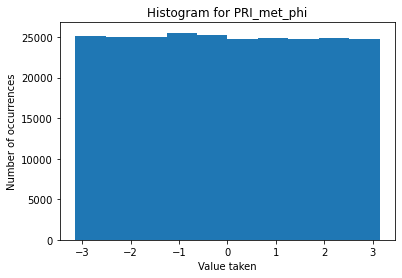

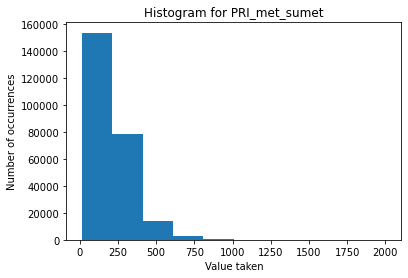

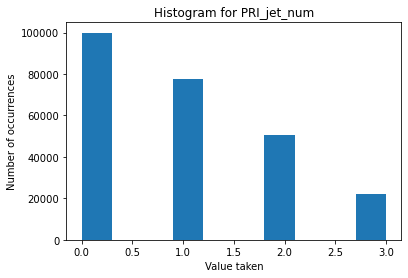

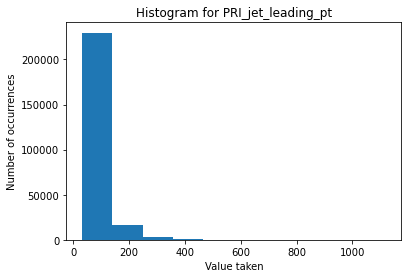

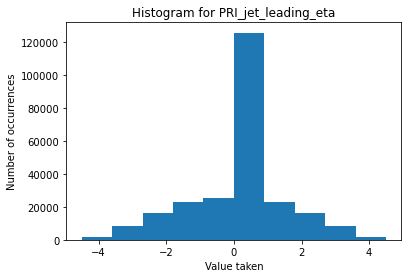

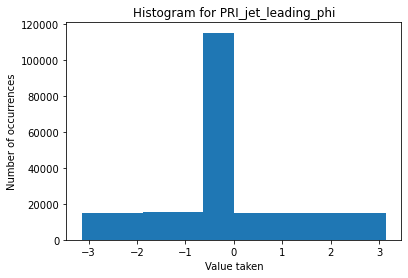

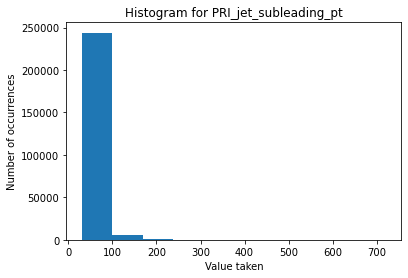

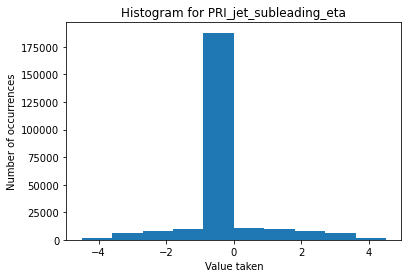

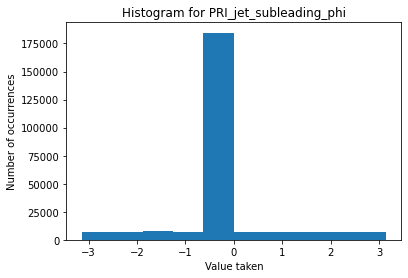

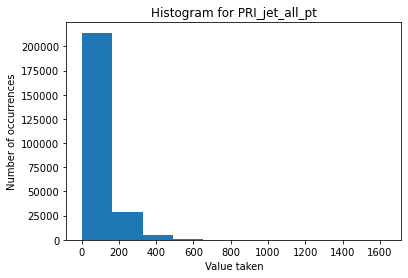

In [20]:
for i in range(30):
    plt.hist(tX[:,i])
    plt.title("Histogram for " + features[i])
    plt.xlabel('Value taken')
    plt.ylabel('Number of occurrences')
    plt.show()

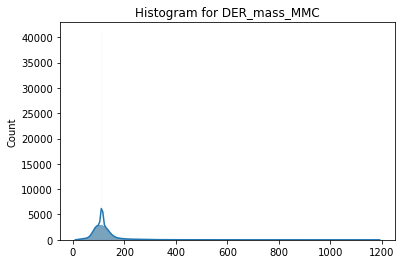

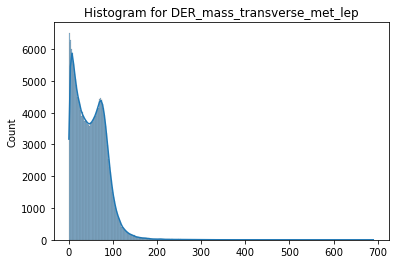

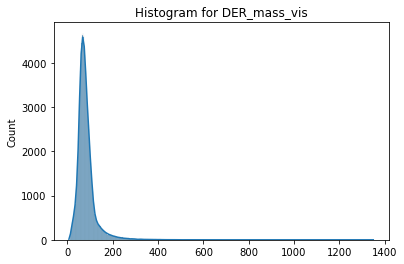

KeyboardInterrupt: 

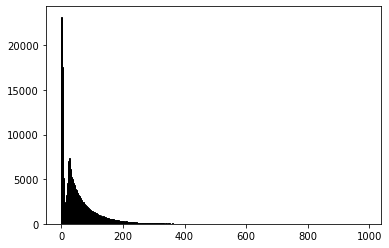

In [21]:
for i in range(30):
    sns.histplot(tX[:,i], kde=True)
    plt.title("Histogram for " + features[i])
    plt.show()

In [29]:
def correlation_matrix(x,y) :
    n = x.shape[1]
    coef = np.zeros((n,n))
    coef = np.corrcoef(x.T) #Return Pearson product-moment correlation coefficients
    plt.figure(figsize = (6,5))
    sns.heatmap(coef,xticklabels = features, yticklabels = features)
    '''plt.matshow(coef,fignum = 1)
    plt.colorbar()
    plt.title("Correlation matrix")
    plt.show()'''

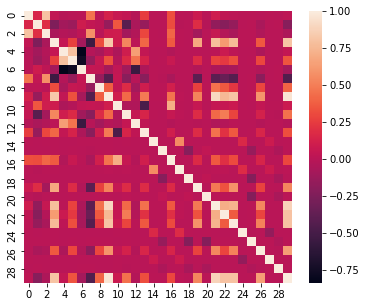

In [30]:
correlation_matrix(tX,y)